In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from importlib import reload


In [51]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results/HER2Networks.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    print(p)

SSNMTF(G_init=None, adjacencies=None, compute_ktt=False, epsilon=1e-10,
    gamma=0, init='svd', k=14, max_iter=500,
    random_state=<mtrand.RandomState object at 0x128436b88>, rtol=1e-08,
    tol=0.01, verbose=1)


In [54]:
p.G_.shape

(1000, 14)

In [37]:
import nmtf.utils; reload(nmtf.utils)
from nmtf.utils import erdos_renyi
import nmtf.thresholding; reload(nmtf.thresholding)
from nmtf.thresholding import thresholding_generating_graphs

Threshold  0.01
1000 499498.0
Done repetition  0
Done repetition  1
Threshold  0.02
1000 499496.0
Done repetition  0
Done repetition  1
Threshold  0.03
1000 499494.0
Done repetition  0
Done repetition  1
Threshold  0.04
1000 499492.0
Done repetition  0
Done repetition  1
Threshold  0.05
1000 499484.0
Done repetition  0
Done repetition  1
Threshold  0.060000000000000005
1000 499481.0
Done repetition  0
Done repetition  1
Threshold  0.06999999999999999
1000 499469.0
Done repetition  0
Done repetition  1
Threshold  0.08
1000 499457.0
Done repetition  0
Done repetition  1


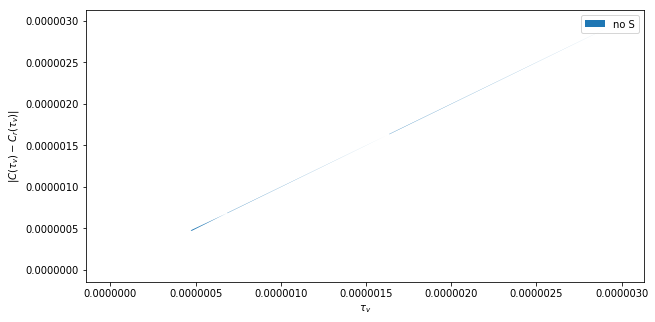

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

integrated = p.G_.dot(np.mean(p.S_, 0)).dot(p.G_.T)
res = thresholding_generating_graphs(integrated, min_v=0.01, max_v=0.09, make_plot=True,
                      ax=ax, label='no S', n_repetitions=2)
# integrated = p.G_.dot(np.mean(p.S_, axis=0)).dot(p.G_.T)
# res = thresholding_generating_graphs(integrated, min_v=0.01, max_v=0.09, make_plot=True,
#                   ax=ax, label='mean')
plt.legend()
plt.show()

In [24]:
print(res)

(array([0.00437762, 0.00438102, 0.03339981, 0.03339958, 0.09911177,
       0.09912001, 0.18925393, 0.18924057, 0.28675936, 0.28677379,
       0.37721835, 0.37727709, 0.45476464, 0.45486405, 0.51841101,
       0.5182748 ]), array([0.00000000e+00, 3.40802982e-06, 0.00000000e+00, 2.28521128e-07,
       0.00000000e+00, 8.24028972e-06, 0.00000000e+00, 1.33552408e-05,
       0.00000000e+00, 1.44322291e-05, 0.00000000e+00, 5.87444556e-05,
       0.00000000e+00, 9.94039964e-05, 0.00000000e+00, 1.36211468e-04]))


No handles with labels found to put in legend.


[4.02812439e-09 4.02812439e-09 2.41687467e-08 2.41687467e-08
 6.04218671e-08 6.04218671e-08 1.12787485e-07 1.12787485e-07
 4.71291071e-07 4.71291071e-07 6.84781365e-07 6.84781365e-07
 1.63564719e-06 1.63564719e-06 2.98109862e-06 2.97707903e-06]
[4.02812439e-09 4.02812439e-09 2.41687467e-08 2.41687467e-08
 6.04218671e-08 6.04218671e-08 1.12787485e-07 1.12787485e-07
 4.71291071e-07 4.83374936e-07 6.84781365e-07 6.88809284e-07
 1.63564719e-06 1.63967496e-06 2.98109862e-06 2.98109862e-06]


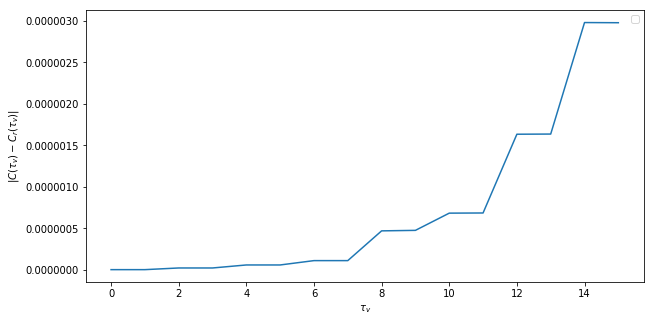

In [39]:
print(res[0] - res[1])
print(res[0] + res[1])
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res[0])
#ax.fill_between(np.arange(0, len(res[0])), res[0], res[0] + res[1],
 #                  label='no S')
ax.set_xlabel(r'$\tau_v$')
ax.set_ylabel(r' $|C(\tau_v) - C_r(\tau_v)|$ ')
plt.legend()
plt.show()

# look at results

In [41]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results/results_thresholding_results.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    t = u.load()
    print(t)

(array([1.20843735e-08, 1.20843734e-08, 1.20843735e-08, 1.20843734e-08,
       1.20843734e-08, 1.20843734e-08, 1.20843735e-08, 1.20843734e-08,
       1.20843735e-08, 1.20843735e-08, 1.20843734e-08, 1.20843734e-08,
       1.20843735e-08, 1.20843734e-08, 1.20843734e-08, 1.20843734e-08,
       1.20843734e-08, 1.20843734e-08, 1.20843734e-08, 1.20843734e-08,
       6.44902323e-08, 6.24762004e-08, 6.31475444e-08, 6.34832164e-08,
       6.36846195e-08, 6.38188883e-08, 6.33393569e-08, 6.34832163e-08,
       6.35951070e-08, 6.36846195e-08, 1.29011780e-07, 1.29011780e-07,
       1.29011780e-07, 1.29011780e-07, 1.28206179e-07, 1.28340446e-07,
       1.28436351e-07, 1.28508279e-07, 1.28564224e-07, 1.28608979e-07,
       3.50852646e-07, 3.46824753e-07, 3.46824753e-07, 3.47831726e-07,
       3.48435910e-07, 3.46824752e-07, 3.46824752e-07, 3.46824753e-07,
       3.46824753e-07, 3.46824753e-07, 5.28814657e-07, 5.24782835e-07,
       5.30154561e-07, 5.32840424e-07, 5.30424156e-07, 5.31498501e-07,
     

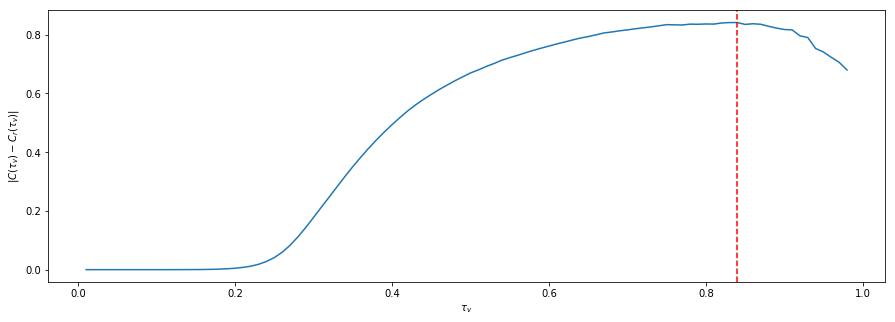

In [50]:
plt.figure(figsize=(15,5))
xs = np.arange(0.01, 0.99, 0.01)
ys = t[0][np.arange(0, len(t[0]), 10)]
plt.plot(xs, ys)
plt.axvline(xs[np.argmax(ys)], color='r', linestyle='--')
plt.xlabel(r'$\tau_v$')
plt.ylabel(r' $|C(\tau_v) - C_r(\tau_v)|$ ')
plt.show()